### ***Supervised Learning Algorithms***
- *Regression: Linear Regression, Decision Trees, Random Forests.*
- *Classification: Logistic Regression, KNN, SVM.*
- Ye tumhe real prediction tasks samajhne main madad karenge


## ***Regression***

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample dataset (Age vs Salary)
df = pd.DataFrame(
    {
        "Age": [20, 25, 30, 35, 40, 45, 50],
        "Salary": [20000, 25000, 30000, 35000, 40000, 45000, 50000],
    }
)

# Features (X) and Target (y)
X = df[["Age"]]  # independent variable
y = df["Salary"]  # dependent variable


# Initialize and train model
model = LinearRegression()
model.fit(X, y)

# Predict on test data
y_pred = model.predict([[60]])

# Evaluation
print("Predicted Salary for Age 60:", y_pred[0])

# Show coefficients
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)

Predicted Salary for Age 60: 60000.00000000001
Coefficient (slope): [1000.]
Intercept: -1.4551915228366852e-11


c:\Users\REHMAN\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### **Intercept aur Slope ka Output**
- `Coefficient (slope)`: [1000.] → Matlab har 1 year Age increase → Salary 1000 increase.
- `Intercept`: -1.4551915228366852e-11 → Ye value ideally 0 honi chahiye, lekin floating‑point precision ki wajah se ek bohot chhoti error aa gayi hai (ignore kar sakte ho).
___


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features (X) and Target (y)
X = df[["Age"]]  # independent variable
y = df["Salary"]  # dependent variable

# Split dataset (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
print("Predicted Salaries for Test Set:", y_pred)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Show coefficients
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)

Predicted Salaries for Test Set: [20000. 25000. 45000.]
Mean Squared Error: 8.823259867232295e-24
R2 Score: 1.0
Coefficient (slope): [1000.]
Intercept: -7.275957614183426e-12


#### **Mean Squared Error (MSE)**

- Definition: Actual values (y_i) aur predicted values (\hat {y}_i) ke beech difference ka square le kar average nikalta hai.
- Kya karta hai: Batata hai ke prediction kitni error produce kar rahi hai.
- Interpretation:
- Chhoti value → model accurate hai.
- Badi value → model ki predictions actual se door hain.
- ⚠️ Large errors ko zyada penalize karta hai (kyunki square hota hai)


#### **R² Score (Coefficient of Determination)**
- Definition: Batata hai ke model ne data ke variance ko kitna explain kiya hai.
- Range: 0 se 1 (kabhi kabhi negative bhi ho sakta hai agar model bohot weak ho).
- Interpretation:
- R^2=1 → Perfect fit (model ne sab variance explain kar diya).
- R^2=0 → Model ne kuch bhi explain nahi kiya (sirf mean predict kar raha hai).
- Negative → Model mean se bhi bura perform kar raha hai.


## ***Polynomial Regression***

- Polynomial Regression us line ko curve banata hai by adding higher‑order terms.
- Useful jab data ek non‑linear pattern follow kare.


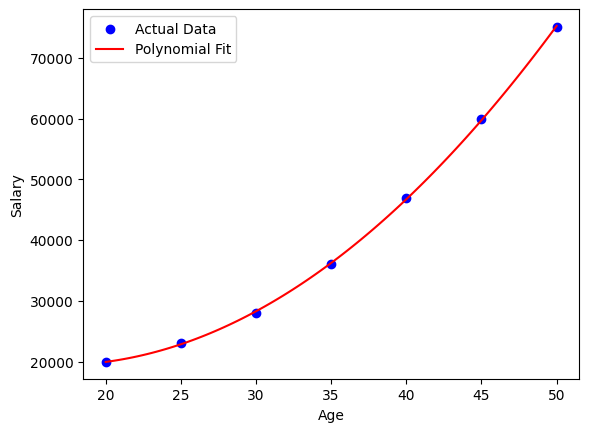

Coefficients: [    0.         -1690.47619048    50.47619048]
Intercept: 33571.428571429395


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample dataset (Age vs Salary, but curved pattern)
X = np.array([20, 25, 30, 35, 40, 45, 50]).reshape(-1, 1)
y = np.array([20000, 23000, 28000, 36000, 47000, 60000, 75000])

# Polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
X_range = np.linspace(20, 50, 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(X_range))

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred, color='red', label='Polynomial Fit')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

##### ***Output Explanation***

- Blue dots → Actual data points.
- Red curve → Polynomial Regression fit (degree=2).
- Model ne curved relation seekha (Salary growth accelerates with Age).


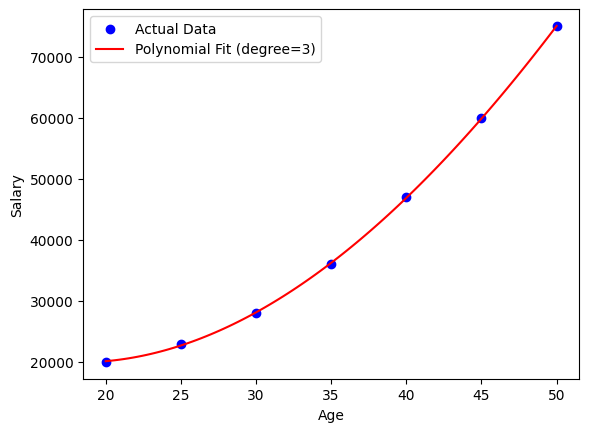

Coefficients: [ 0.00000000e+00 -2.46825397e+03  7.38095238e+01 -2.22222222e-01]
Intercept: 41738.095237517744


In [8]:
# Sample dataset (Age vs Salary, curved pattern)
X = np.array([20, 25, 30, 35, 40, 45, 50]).reshape(-1, 1)
y = np.array([20000, 23000, 28000, 36000, 47000, 60000, 75000])

# Polynomial transformation (degree=3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_poly, y)

# Predict for smooth curve
X_range = np.linspace(20, 50, 100).reshape(-1, 1)
y_pred = model.predict(poly.transform(X_range))

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred, color='red', label='Polynomial Fit (degree=3)')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

- Polynomial Regression degree=3 ka matlab hai ke model ke formula main x^2 aur x^3 terms bhi add ho jati hain.
- Formula:
y=\beta _0+\beta _1x+\beta _2x^2+\beta _3x^3
- Ye ek cubic curve banata hai jo complex patterns ko capture kar sakta hai.


#### ***Classification***